In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import skimage

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = 'C:/Users/User/Documents'
train_data_directory = os.path.join(ROOT_PATH, "Traffic_Signs_Training")
test_data_directory = os.path.join(ROOT_PATH, "Traffic_Signs_Testing")

images, labels = load_data(train_data_directory)

In [3]:
print(np.array(images).ndim)
print(np.array(images).size)
images

1
4575


[Array([[[210, 249, 232],
         [204, 249, 208],
         [197, 198, 155],
         ...,
         [ 51,  60,  40],
         [ 54,  64,  44],
         [ 57,  66,  46]],
 
        [[209, 250, 236],
         [212, 255, 217],
         [200, 196, 156],
         ...,
         [ 49,  57,  38],
         [ 51,  59,  41],
         [ 53,  60,  42]],
 
        [[203, 246, 236],
         [207, 246, 213],
         [202, 192, 156],
         ...,
         [ 47,  53,  35],
         [ 48,  54,  36],
         [ 48,  55,  37]],
 
        ...,
 
        [[  2,  22,  25],
         [ 26,  56,  77],
         [ 71, 140, 159],
         ...,
         [ 84,  77,  50],
         [ 68,  66,  41],
         [ 56,  64,  44]],
 
        [[  0,  22,  32],
         [ 30,  75, 106],
         [ 87, 176, 198],
         ...,
         [ 86,  80,  52],
         [ 68,  66,  41],
         [ 55,  63,  42]],
 
        [[  0,  32,  50],
         [ 42, 101, 135],
         [121, 217, 239],
         ...,
         [ 87,  80,  52],
  

In [4]:
print(np.array(labels).ndim)
print(np.array(labels).size)
print(len(set(labels)))

1
4575
62


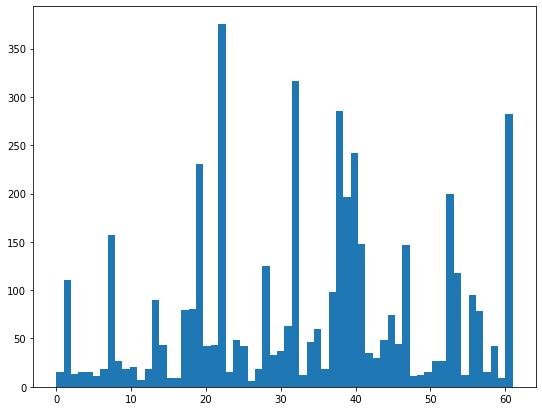

In [5]:
# Let's the distribution of different traffic signs

plt.figure(figsize = (9,7))
plt.hist(labels, bins = 62)
plt.show()

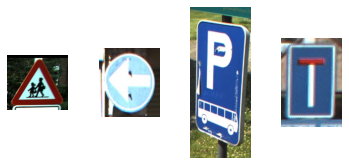

In [6]:
traffic_signs = [250, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

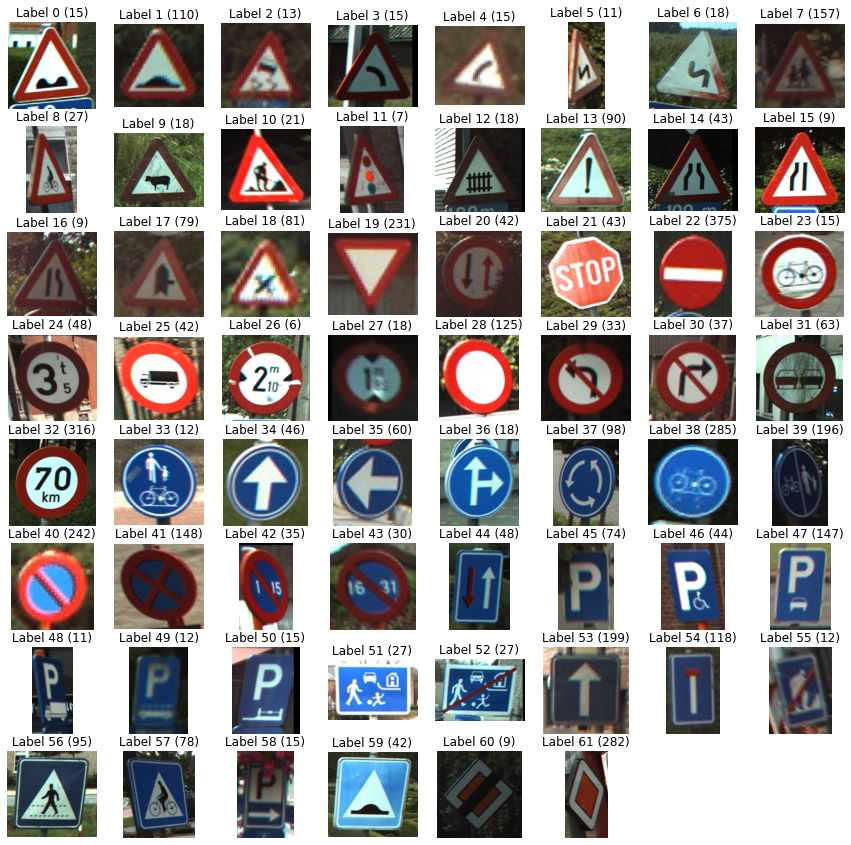

In [7]:
unique_labels = set(labels)

plt.figure(figsize=(15, 15))
i = 1
for label in unique_labels:

    image = images[labels.index(label)]
    plt.subplot(8, 8, i)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    i += 1
    plt.imshow(image)

plt.show()

In [8]:
from skimage import transform
from skimage.color import rgb2gray

images28 = [transform.resize(image, (28, 28)) for image in images]

images28 = np.array(images28)
images28 = rgb2gray(images28)

In [9]:
# Building the model

tf.compat.v1.disable_eager_execution()

x = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.compat.v1.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.compat.v1.layers.flatten(x)

# Fully connected layer 
logits = tf.compat.v1.layers.dense(images_flat, units = 62, activation = tf.nn.relu)

# Loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
# Optimizer 
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

# Converts logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("flatten/Reshape:0", shape=(None, 784), dtype=float32)
logits:  Tensor("dense/Relu:0", shape=(None, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(None,), dtype=int64)


In [11]:
tf.compat.v1.set_random_seed(42)
sess = tf.compat.v1.Session()

sess.run(tf.compat.v1.global_variables_initializer())

for i in range(201):
    _, accuracy_val = sess.run([optimizer, accuracy], feed_dict = {x: images28, y: labels})

In [12]:
accuracy_val

36.61683

[24, 61, 22, 22, 35, 7, 39, 32, 38, 1]
[28 61 61 54 28  7 38 28 38  1]


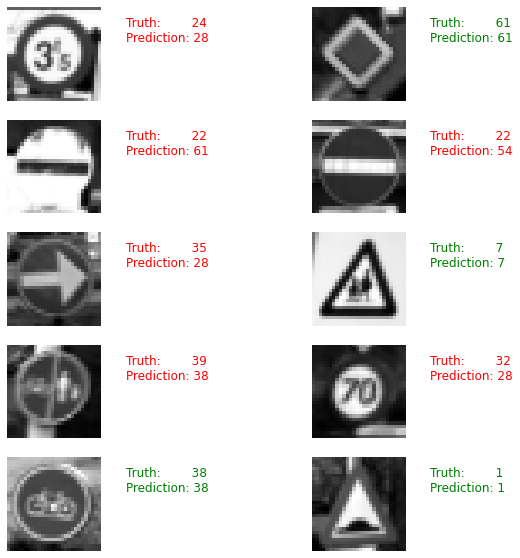

In [13]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
    plt.text(35, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize = 12, color = color)
    plt.imshow(sample_images[i],  cmap = "gray")

plt.show()

In [14]:
# Load the test data

test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions 
prediction = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, prediction)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.405
